In [1]:
import pandas as pd

df_raw=pd.read_csv('data/train.csv')
df_raw.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0


## 데이터 가지고오고 기본 컬럼 추가

In [2]:
df_raw['식사가능인원'] = df_raw['본사정원수'] - df_raw['본사휴가자수'] - df_raw['본사출장자수'] - df_raw['현본사소속재택근무자수']
df_raw.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,식사가능인원
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0


In [3]:
df_raw['중식결식'] = df_raw['식사가능인원'] - df_raw['중식계']
df_raw['석식결식'] = df_raw['식사가능인원'] - df_raw['석식계']
df_raw.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,식사가능인원,중식결식,석식결식
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,1362.0,2070.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,1511.0,1818.0


## 날씨 데이터

In [4]:
weather = pd.read_csv('data/진주시_날짜_시간_날씨.csv')
print(len(weather))
weather.head(2)

45345


,지점,지점명,일시,기온(°C),강수량(mm),습도(%),적설(cm),일자,시간,연,월,일
0,192,진주,2016-02-01 00:00,0.5,NaN,44.0,NaN,2016-02-01,00:00,2016,2,1
1,192,진주,2016-02-01 01:00,-0.4,NaN,49.0,NaN,2016-02-01,01:00,2016,2,1


In [5]:
# 일단 결측치 전체 0으로 처리 후 작업
weather_f = weather.fillna(0)
weather_f.isna().sum().sum()

0

In [6]:
tmp = []
for x in weather_f['강수량(mm)']:
    if x == 0.0:
        tmp.append(0)
    else:
        tmp.append(1)
weather_f['강수여부'] = tmp

In [7]:
weather_f['강수여부'].unique()

array([0, 1], dtype=int64)

In [8]:
# 비가 온 데이터 2266개
weather_f[weather_f['강수여부']==1]

,지점,지점명,일시,기온(°C),강수량(mm),습도(%),적설(cm),일자,시간,연,월,일,강수여부
270,192,진주,2016-02-12 06:00,6.3,3.6,88.0,0.0,2016-02-12,06:00,2016,2,12,1
273,192,진주,2016-02-12 09:00,6.4,4.0,89.0,0.0,2016-02-12,09:00,2016,2,12,1
276,192,진주,2016-02-12 12:00,7.7,9.4,90.0,0.0,2016-02-12,12:00,2016,2,12,1
279,192,진주,2016-02-12 15:00,9.6,15.8,91.0,0.0,2016-02-12,15:00,2016,2,12,1
282,192,진주,2016-02-12 18:00,11.7,20.4,91.0,0.0,2016-02-12,18:00,2016,2,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45209,192,진주,2021-04-04 09:00,13.1,1.1,96.0,0.0,2021-04-04,09:00,2021,4,4,1
45210,192,진주,2021-04-04 10:00,12.6,1.6,96.0,0.0,2021-04-04,10:00,2021,4,4,1
45211,192,진주,2021-04-04 11:00,12.5,0.1,93.0,0.0,2021-04-04,11:00,2021,4,4,1
45212,192,진주,2021-04-04 12:00,12.3,0.1,93.0,0.0,2021-04-04,12:00,2021,4,4,1


In [9]:
# 점심 날씨 데이터
lw = weather_f[['일자', '월', '일', '강수여부','기온(°C)','강수량(mm)']][weather_f['시간']== '12:00']
lw.columns = ['일자', '월', '일', '중식강수여부','중식기온','점심강수량']
lw.head(2)

,일자,월,일,중식강수여부,중식기온,점심강수량
12,2016-02-01,2,1,0,3.0,0.0
36,2016-02-02,2,2,0,1.7,0.0


In [10]:
# 저녁 날씨 데이터
dw = weather_f[['일자','월', '일','강수여부','기온(°C)','강수량(mm)']][weather_f['시간'] == '18:00']
dw.columns = ['일자', '월', '일', '석식강수여부','석식기온','저녁강수량']
dw.head()

,일자,월,일,석식강수여부,석식기온,저녁강수량
18,2016-02-01,2,1,0,0.9,0.0
42,2016-02-02,2,2,0,2.4,0.0
66,2016-02-03,2,3,0,3.0,0.0
90,2016-02-04,2,4,0,4.0,0.0
114,2016-02-05,2,5,0,5.7,0.0


In [11]:
weather_f[['일자','연', '월', '일','강수여부','기온(°C)']][weather_f['시간'] == '19:00'][weather_f['일자'] == '2020-01-01']

<ipython-input-11-2062c58ae6d7>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weather_f[['일자','연', '월', '일','강수여부','기온(°C)']][weather_f['시간'] == '19:00'][weather_f['일자'] == '2020-01-01']


,일자,연,월,일,강수여부,기온(°C)
34227,2020-01-01,2020,1,1,0,-0.5


In [12]:
lw[lw.일자=='2019-12-31']

,일자,월,일,중식강수여부,중식기온,점심강수량


In [13]:
df_raw =pd.merge(df_raw, lw, how='left')
df_raw.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,식사가능인원,중식결식,석식결식,월,일,중식강수여부,중식기온,점심강수량
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2401.0,1362.0,2070.0,2.0,1.0,0.0,3.0,0.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2378.0,1511.0,1818.0,2.0,2.0,0.0,1.7,0.0


In [14]:
df_raw =pd.merge(df_raw, dw, how='left')
df_raw.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식결식,석식결식,월,일,중식강수여부,중식기온,점심강수량,석식강수여부,석식기온,저녁강수량
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,1362.0,2070.0,2.0,1.0,0.0,3.0,0.0,0.0,0.9,0.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,1511.0,1818.0,2.0,2.0,0.0,1.7,0.0,0.0,2.4,0.0


In [15]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
 12  식사가능인원          1205 non-null   float64
 13  중식결식            1205 non-null   float64
 14  석식결식            1205 non-null   float64
 15  월               1202 non-null   float64
 16  일               1202 non-null   float64
 17  중식강수여부          1202 non-null   f

In [16]:
df_raw['일자'] = pd.to_datetime(df_raw['일자'])
df_raw.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,중식결식,석식결식,월,일,중식강수여부,중식기온,점심강수량,석식강수여부,석식기온,저녁강수량
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,1362.0,2070.0,2.0,1.0,0.0,3.0,0.0,0.0,0.9,0.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,1511.0,1818.0,2.0,2.0,0.0,1.7,0.0,0.0,2.4,0.0


## 코로나 추가

In [17]:
cor = pd.read_csv('data/코로나정보.csv')

cor_a=cor[cor['gubun']=='합계']
cor_a.head(2)

,createDt,deathCnt,defCnt,gubun,gubunCn,gubunEn,incDec,isolClearCnt,isolIngCnt,localOccCnt,overFlowCnt,qurRate,seq,stdDay,updateDt
0,2021-04-10 09:00:00.000,1765,108939,합계,合计,Total,677,99287,7887,662,15,210.11,8493,2021년 04월 10일 00시,2021-09-16 10:11:33.897
19,2021-04-09 09:00:00.000,1764,108262,합계,合计,Total,671,98774,7724,644,27,208.81,8474,2021년 04월 09일 00시,2021-09-16 10:11:33.897


In [18]:
cor = cor_a.pivot_table(['incDec'], ['createDt'])
cor.head(2)

,incDec
createDt,
2020-02-01 09:00:00.000,1
2020-02-02 09:00:00.000,3


In [19]:
cor = cor.reset_index()

In [20]:
tmp = cor['createDt'].str.split(' ')
tmp.str[0][:3]

0    2020-02-01
1    2020-02-02
2    2020-02-03
Name: createDt, dtype: object

In [21]:
cor['일자'] = tmp.str.get(0) ## 0번째 년월일만 가지고 온다
cor = cor.drop(['createDt'], axis=1)

In [22]:
cor.columns

Index(['incDec', '일자'], dtype='object')

In [23]:
cor.columns = ['확진자수', '일자']
cor.head(2)


,확진자수,일자
0,1,2020-02-01
1,3,2020-02-02


In [24]:
cor['일자'] = pd.to_datetime(cor['일자'])

cor.head(2)

,확진자수,일자
0,1,2020-02-01
1,3,2020-02-02


In [25]:
cor['한달추가'] = 0

In [26]:
cor['한달추가'][30:] = cor['확진자수'][:-30]

<ipython-input-26-118c72154e0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cor['한달추가'][30:] = cor['확진자수'][:-30]


In [27]:
df_raw =pd.merge(df_raw, cor, how='left')
df_raw.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,월,일,중식강수여부,중식기온,점심강수량,석식강수여부,석식기온,저녁강수량,확진자수,한달추가
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,2.0,1.0,0.0,3.0,0.0,0.0,0.9,0.0,NaN,NaN
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,2.0,2.0,0.0,1.7,0.0,0.0,2.4,0.0,NaN,NaN


In [28]:
df_raw.isna().sum()

일자                  0
요일                  0
본사정원수               0
본사휴가자수              0
본사출장자수              0
본사시간외근무명령서승인건수      0
현본사소속재택근무자수         0
조식메뉴                0
중식메뉴                0
석식메뉴                0
중식계                 0
석식계                 0
식사가능인원              0
중식결식                0
석식결식                0
월                   3
일                   3
중식강수여부              3
중식기온                3
점심강수량               3
석식강수여부              3
석식기온                3
저녁강수량               3
확진자수              977
한달추가              977
dtype: int64

In [29]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
 12  식사가능인원          1205 non-null   float64       
 13  중식결식            1205 non-null   float64       
 14  석식결식            1205 non-null   float64       
 15  월   

In [30]:
df_raw['확진자수'] = df_raw['확진자수'].fillna(0)
df_raw['한달추가'].fillna(0,inplace=True)
df_raw.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,...,월,일,중식강수여부,중식기온,점심강수량,석식강수여부,석식기온,저녁강수량,확진자수,한달추가
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",...,2.0,1.0,0.0,3.0,0.0,0.0,0.9,0.0,0.0,0.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",...,2.0,2.0,0.0,1.7,0.0,0.0,2.4,0.0,0.0,0.0


In [31]:
df_raw.corr()

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,중식결식,석식결식,월,일,중식강수여부,중식기온,점심강수량,석식강수여부,석식기온,저녁강수량,확진자수,한달추가
본사정원수,1.000000,0.244666,-0.061688,0.146544,0.452293,-0.115529,-0.173852,0.503771,0.487612,0.551603,0.243018,-0.023711,-0.001630,0.071550,-0.025787,0.027795,0.053181,-0.012541,0.305390,0.261673
본사휴가자수,0.244666,1.000000,-0.273318,-0.230789,0.065397,-0.391975,-0.316894,-0.552661,-0.066617,-0.260700,0.184595,-0.024801,-0.013784,0.224243,-0.035524,0.041124,0.215285,0.069379,0.101654,0.037095
본사출장자수,-0.061688,-0.273318,1.000000,-0.308757,-0.352643,-0.512680,-0.188164,0.136389,0.566642,0.245077,0.217503,0.151476,-0.001267,0.136040,-0.008011,-0.047511,0.115883,-0.049534,-0.263780,-0.293153
본사시간외근무명령서승인건수,0.146544,-0.230789,-0.308757,1.000000,0.156792,0.535611,0.571168,0.309118,-0.248368,-0.121471,0.021875,-0.090740,-0.000983,-0.057351,0.012796,-0.027297,-0.058736,-0.044459,0.096193,0.074319
현본사소속재택근무자수,0.452293,0.065397,-0.352643,0.156792,1.000000,0.076509,-0.057534,-0.150393,-0.183506,-0.090418,0.035061,-0.030404,-0.053753,-0.023414,-0.037543,0.000759,-0.020669,-0.024484,0.603217,0.637133
중식계,-0.115529,-0.391975,-0.512680,0.535611,0.076509,1.000000,0.508287,0.286810,-0.684609,-0.098006,-0.147985,-0.090230,0.090353,-0.128891,0.095968,0.070723,-0.114495,0.023015,0.099820,0.061293
석식계,-0.173852,-0.316894,-0.188164,0.571168,-0.057534,0.508287,1.000000,0.172373,-0.327745,-0.530154,-0.120593,-0.178991,0.026126,-0.003970,0.036170,-0.004996,0.005775,-0.016221,-0.054571,-0.062164
식사가능인원,0.503771,-0.552661,0.136389,0.309118,-0.150393,0.286810,0.172373,1.000000,0.501934,0.743825,0.013153,-0.021574,0.043512,-0.129250,0.028899,0.005352,-0.136724,-0.040382,-0.097349,-0.100908
중식결식,0.487612,-0.066617,0.566642,-0.248368,-0.183506,-0.684609,-0.327745,0.501934,1.000000,0.654443,0.142961,0.064775,-0.048286,0.018050,-0.064390,-0.059516,-0.000545,-0.051241,-0.164192,-0.132115
석식결식,0.551603,-0.260700,0.245077,-0.121471,-0.090418,-0.098006,-0.530154,0.743825,0.654443,1.000000,0.092764,0.102474,0.019625,-0.108059,0.000317,0.007962,-0.121049,-0.023638,-0.046769,-0.044680


<AxesSubplot:>

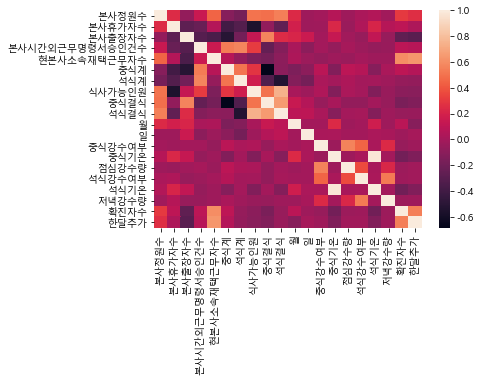

In [32]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')
sns.heatmap(df_raw.corr())

## 연월일?

In [33]:
df_raw.drop(columns='한달추가', inplace=True) #유의미하지않아 삭제

In [34]:
# 점심 데이터 날짜 정리
df_raw['연'] = df_raw['일자'].dt.strftime('%Y')
df_raw['월'] = df_raw['일자'].dt.strftime('%m')
df_raw['일'] = df_raw['일자'].dt.strftime('%d')

In [35]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1205 non-null   datetime64[ns]
 1   요일              1205 non-null   object        
 2   본사정원수           1205 non-null   int64         
 3   본사휴가자수          1205 non-null   int64         
 4   본사출장자수          1205 non-null   int64         
 5   본사시간외근무명령서승인건수  1205 non-null   int64         
 6   현본사소속재택근무자수     1205 non-null   float64       
 7   조식메뉴            1205 non-null   object        
 8   중식메뉴            1205 non-null   object        
 9   석식메뉴            1205 non-null   object        
 10  중식계             1205 non-null   float64       
 11  석식계             1205 non-null   float64       
 12  식사가능인원          1205 non-null   float64       
 13  중식결식            1205 non-null   float64       
 14  석식결식            1205 non-null   float64       
 15  월   

In [36]:
df_T = df_raw[df_raw.columns.drop(['조식메뉴','중식메뉴', '석식메뉴', '일','연'])]

In [37]:
df_T.head(2)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,중식결식,석식결식,월,중식강수여부,중식기온,점심강수량,석식강수여부,석식기온,저녁강수량,확진자수
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,1362.0,2070.0,02,0.0,3.0,0.0,0.0,0.9,0.0,0.0
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2378.0,1511.0,1818.0,02,0.0,1.7,0.0,0.0,2.4,0.0,0.0


## 코로나 데이터 결측치

In [38]:
df_T[df_T.일자=='2021-01-04']['확진자수'] = 985.0
df_T.loc[1188,'확진자수'] = 985
df_T[df_T.일자=='2021-01-04']['확진자수']

C:\Users\TH\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\TH\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


1188    985.0
Name: 확진자수, dtype: float64

In [39]:
len(df_T)

1205

In [40]:
df_T[df_T.일자=='2019-12-27']

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,중식결식,석식결식,월,중식강수여부,중식기온,점심강수량,석식강수여부,석식기온,저녁강수량,확진자수
953,2019-12-27,금,3111,706,236,1,0.0,387.0,226.0,2169.0,1782.0,1943.0,12,0.0,6.0,0.0,0.0,4.6,0.0,0.0


## 날씨 결측치

In [41]:
df_T[df_T.점심강수량.isna()]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,중식결식,석식결식,월,중식강수여부,중식기온,점심강수량,석식강수여부,석식기온,저녁강수량,확진자수
659,2018-10-19,금,2805,207,303,40,0.0,627.0,430.0,2295.0,1668.0,1865.0,10,NaN,NaN,NaN,NaN,NaN,NaN,0.0
709,2018-12-31,월,2846,1085,132,28,0.0,332.0,135.0,1629.0,1297.0,1494.0,12,NaN,NaN,NaN,NaN,NaN,NaN,0.0
955,2019-12-31,화,3111,709,149,22,0.0,349.0,0.0,2253.0,1904.0,2253.0,12,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [42]:
df_T.loc[659,'중식기온'] = 18
df_T.loc[659,'석식기온'] = 13.9

df_T.loc[709,'중식기온'] = 3.2
df_T.loc[709,'석식기온'] = 5.3

df_T.loc[955,'중식기온'] = 2.1
df_T.loc[955,'석식기온'] = -2.0

C:\Users\TH\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [43]:
df_T.fillna(0,inplace=True) #나머지는 비가안와 다 0

C:\Users\TH\anaconda3\lib\site-packages\pandas\core\frame.py:5171: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [44]:
df_T.iloc[659][12:-1]
df_T.iloc[709][12:-1]
df_T.iloc[955][12:-1]

월          12
중식강수여부    0.0
중식기온      2.1
점심강수량     0.0
석식강수여부    0.0
석식기온     -2.0
저녁강수량     0.0
Name: 955, dtype: object

In [45]:
df_T.isna().sum().sum()

0

In [46]:
len(df_T)

1205

## 휴일 공휴일

In [47]:
df_T['일자']

0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
          ...    
1200   2021-01-20
1201   2021-01-21
1202   2021-01-22
1203   2021-01-25
1204   2021-01-26
Name: 일자, Length: 1205, dtype: datetime64[ns]

In [48]:
import datetime
x = df_T['일자'][0]

In [49]:
## 일자를 시작일로부터 1씩 증가
x = x+ datetime.timedelta(days=1)
x in df_T['일자'].values

True

In [50]:
['2016-02-01'] in df_T['일자'].values

<ipython-input-50-f55645371618>:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  ['2016-02-01'] in df_T['일자'].values


False

In [51]:
x = df_T['일자'][0] ##시작일
x in df_T['일자'].values

True

In [52]:
x = df_T['일자'][0] ##시작일
be = []
af = []
i = 0
while 1:
    if x in df_T['일자'].values: #출근하는날
        be.append(0) #평번하게 출근하는날
        af.append(0)
        if len(af)>2 and be[-2] ==1:
            af.pop()
            af.append(1)
            
    else : #쉬는날 
        if be[-1] == 0: #쉬는날인데 전날이 평번한 출근이라면
            be[-1] =1
    
    x += datetime.timedelta(days=1) #1일씩 더한다
    if x == datetime.datetime(2021, 1, 27):
        break

len(af)

1205

In [53]:
len(be),len(af)

(1205, 1205)

In [54]:
df_T['휴일전날'] = be
df_T['휴일다음날'] = af

C:\Users\TH\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [55]:
df_T['휴일전날'].sum(), df_T['휴일다음날'].sum()

(280, 280)

### 요일 결측치 수정

In [56]:
df_T[(df_T.요일=='월')&(df_T['휴일다음날']==0)] # 결측치 있음

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,...,월,중식강수여부,중식기온,점심강수량,석식강수여부,석식기온,저녁강수량,확진자수,휴일전날,휴일다음날
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,...,02,0.0,3.0,0.0,0.0,0.9,0.0,0.0,0,0
573,2018-06-01,월,2728,180,291,55,0.0,649.0,395.0,2257.0,...,06,0.0,29.6,0.0,0.0,24.7,0.0,0.0,1,0


In [57]:
df_T.loc[(df_T.일자=='2018-06-01'),'요일'] = '금'
df_T.fillna

C:\Users\TH\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<bound method DataFrame.fillna of              일자 요일  본사정원수  본사휴가자수  본사출장자수  본사시간외근무명령서승인건수  현본사소속재택근무자수  \
0    2016-02-01  월   2601      50     150             238          0.0   
1    2016-02-02  화   2601      50     173             319          0.0   
2    2016-02-03  수   2601      56     180             111          0.0   
3    2016-02-04  목   2601     104     220             355          0.0   
4    2016-02-05  금   2601     278     181              34          0.0   
...         ... ..    ...     ...     ...             ...          ...   
1200 2021-01-20  수   2983      75     198               4        391.0   
1201 2021-01-21  목   2983      92     231             462        351.0   
1202 2021-01-22  금   2983     255     248               1        303.0   
1203 2021-01-25  월   2983     107     153             616        327.0   
1204 2021-01-26  화   2983      69     183             551        362.0   

         중식계    석식계  식사가능인원  ...   월  중식강수여부  중식기온  점심강수량  석식강수여부  석식기온  \
0 

In [58]:
df_T.loc[(df_T.일자=='2018-06-01'),'요일']

573    금
Name: 요일, dtype: object

In [67]:
df_T.loc[(df_T.일자=='2019-10-02')]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,...,월,중식강수여부,중식기온,중식강수량,석식강수여부,석식기온,석식강수량,확진자수,휴일전날,휴일다음날
894,2019-10-02,수,3121,244,217,310,0.0,1241.0,743.0,2660.0,...,10,1.0,20.3,6.8,1.0,22.3,7.3,0.0,1,1


In [59]:
[df_T[df_T.요일=='월']['휴일다음날']==1]

[0       False
 7        True
 12       True
 17       True
 21       True
         ...  
 1184     True
 1188     True
 1193     True
 1198     True
 1203     True
 Name: 휴일다음날, Length: 240, dtype: bool]

In [60]:
df_T.loc[(df_T.요일=='월'),'휴일다음날']

0       0
7       1
12      1
17      1
21      1
       ..
1184    1
1188    1
1193    1
1198    1
1203    1
Name: 휴일다음날, Length: 240, dtype: int64

In [61]:
df_T.loc[(df_T.요일=='월'),'휴일다음날'] = 0 
df_T.loc[(df_T.요일=='금'),'휴일전날'] = 0

C:\Users\TH\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [62]:
df_T['휴일다음날'].sum(), df_T['휴일전날'].sum() #첫시작이 월요일이여서

(41, 38)

In [63]:
df_T.columns

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계', '석식계', '식사가능인원', '중식결식', '석식결식', '월', '중식강수여부',
       '중식기온', '점심강수량', '석식강수여부', '석식기온', '저녁강수량', '확진자수', '휴일전날', '휴일다음날'],
      dtype='object')

In [64]:
df_T.columns = ['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '중식계', '석식계', '식사가능인원', '중식결식', '석식결식','월', '중식강수여부', '중식기온',
       '중식강수량', '석식강수여부', '석식기온', '석식강수량', '확진자수', '휴일전날', '휴일다음날']

In [65]:
df_T

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,식사가능인원,...,월,중식강수여부,중식기온,중식강수량,석식강수여부,석식기온,석식강수량,확진자수,휴일전날,휴일다음날
0,2016-02-01,월,2601,50,150,238,0.0,1039.0,331.0,2401.0,...,02,0.0,3.0,0.0,0.0,0.9,0.0,0.0,0,0
1,2016-02-02,화,2601,50,173,319,0.0,867.0,560.0,2378.0,...,02,0.0,1.7,0.0,0.0,2.4,0.0,0.0,0,0
2,2016-02-03,수,2601,56,180,111,0.0,1017.0,573.0,2365.0,...,02,0.0,3.2,0.0,0.0,3.0,0.0,0.0,0,0
3,2016-02-04,목,2601,104,220,355,0.0,978.0,525.0,2277.0,...,02,0.0,3.7,0.0,0.0,4.0,0.0,0.0,0,0
4,2016-02-05,금,2601,278,181,34,0.0,925.0,330.0,2142.0,...,02,0.0,6.3,0.0,0.0,5.7,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,1093.0,421.0,2319.0,...,01,0.0,4.8,0.0,0.0,6.7,0.0,404.0,0,0
1201,2021-01-21,목,2983,92,231,462,351.0,832.0,353.0,2309.0,...,01,0.0,9.1,0.0,0.0,9.6,0.0,400.0,0,0
1202,2021-01-22,금,2983,255,248,1,303.0,579.0,217.0,2177.0,...,01,0.0,8.4,0.0,0.0,8.0,0.0,346.0,0,0
1203,2021-01-25,월,2983,107,153,616,327.0,1145.0,502.0,2396.0,...,01,0.0,11.3,0.0,0.0,10.2,0.0,437.0,0,0


In [66]:
df_T.to_csv('data/train_메뉴제외.csv', index=False)